## Final Project Submission

Please fill out:
* Student name: Htoo Aung Latt
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


First I will import various libraries and tool I need to scrub and analyze the data.

In [43]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Removing warning messages
import warnings
warnings.filterwarnings('ignore')

First I will import the data that I will be working with and get familar with it.

In [44]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


I will copy the description for the columns from the column_names MD document included in the repository.

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **date** - Date house was sold
* **price** -  Price is prediction target
* **bedrooms** -  Number of Bedrooms/House
* **bathrooms** -  Number of bathrooms/bedrooms
* **sqft_living** -  Square footage of the home
* **sqft_lot** - Square footage of the lot
* **floors** - Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# Dealing with NA values

I will further investigate for missing data by looking at the info.

In [45]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The waterfront, view and yr_renovated columns seems to have missing values.
I will take a closer look at each of these columns.

In [46]:
df[['waterfront', 'view', 'yr_renovated']].describe()

,waterfront,view,yr_renovated
count,19221.000000,21534.000000,17755.000000
mean,0.007596,0.233863,83.636778
std,0.086825,0.765686,399.946414
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,4.000000,2015.000000


0.0    19075
1.0      146
Name: waterfront, dtype: int64
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


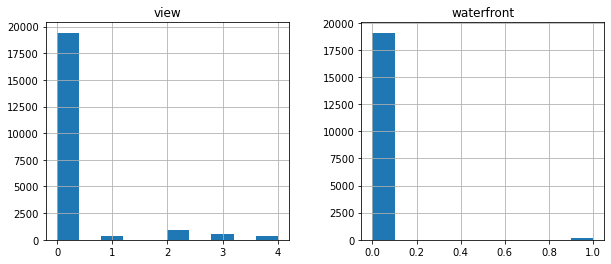

In [47]:
df.hist(column=['waterfront', 'view'], figsize=(10,4))
for col in ['waterfront', 'view']:
    print(df[col].value_counts())

The mode for all three columns is 0 by a large margin. Water front seems to be binary value, while the other two are categorical. I will check the percentage of waterfront property.

In [48]:
#Checking the percentage of waterfront property.
df_waterfront = df[df['waterfront']==1]
print(len(df_waterfront)/len(df['waterfront'])*100)

0.6760198175672547


Only around .7 percentage of the property is on the waterfront. So I will assume that it is safe to replace the missing data with 0. I will also do the same for view since there are only 63 missing values and mode is 0 and made up a large portion of the data.

In [49]:
df['waterfront'] = df['waterfront'].fillna(0.0)
df['view'] = df['view'].fillna(0.0)

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64


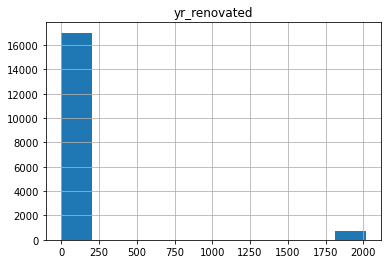

In [50]:
df.hist(column='yr_renovated')
print(df['yr_renovated'].value_counts())

It seems that 0 is a filler value for when the property haven't been renovated at all. I will assume it is safe to fill the na values withe the mode of 0. Since the mode completly dominate the value count, it  make sense to turn the column in to a binary for renovated and unrenovated property.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CF8A595430>]],
      dtype=object)

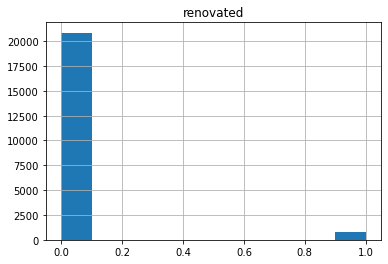

In [51]:
# Fill the na values and change all non zeroes into one
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)
df['yr_renovated'][df['yr_renovated']!= 0] = 1
# I will also rename the column
df = df.rename(columns = {"yr_renovated":"renovated"})
df.hist(column='renovated')

In [52]:
print(df.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
renovated        0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


The missing data is dealt with but I still have to deal with the outliers. I will also have to see which columns would make sense to turn into binary columns then split the data between the contionous and categorical datas.

# Dealing with Duplicates, Placeholders and Fillers

In [53]:
# Using the unique identifier column I drop the duplicates, keeping the first.
print(len(df))
print(len(df[df.duplicated(subset='id')]))
df.drop_duplicates(subset='id', inplace=True)
len(df)

21597
177


21420

I will print out the top five values in each columns to check for placeholders

In [54]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n' )

id 
 2911700010    0.000047
5450300010    0.000047
5104511600    0.000047
1160000115    0.000047
686530110     0.000047
Name: id, dtype: float64 


date 
 6/23/2014    0.006629
6/25/2014    0.006116
6/26/2014    0.006116
7/8/2014     0.005929
4/27/2015    0.005882
Name: date, dtype: float64 


price 
 350000.0    0.008030
450000.0    0.007983
550000.0    0.007283
500000.0    0.007049
425000.0    0.007003
Name: price, dtype: float64 


bedrooms 
 3    0.454295
4    0.319748
2    0.127731
5    0.074043
6    0.012372
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.249860
1.00    0.177124
1.75    0.140990
2.25    0.094818
2.00    0.089309
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006349
1440    0.006209
1400    0.006162
1660    0.005976
1800    0.005976
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016573
6000    0.013352
4000    0.011625
7200    0.010177
7500    0.005509
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.492624
2.0    0.382960
1.5    

I can see that the sqft_basement  have a value of ? as a placeholder and sixty percent of the columns is equal to zero. It would be a good idea to change the column into a binary value.

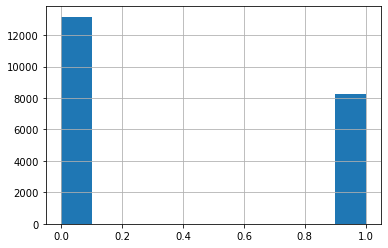

In [55]:
#Change the ? values into 0
df['sqft_basement'][df['sqft_basement']=='?'] = 0
# Change the object type into float
df['sqft_basement'] = df['sqft_basement'].astype(float)
#Change all non zeroes to 1
df['sqft_basement'][df['sqft_basement']!= 0] = 1
# Rename column
df = df.rename(columns = {"sqft_basement":"basement"})



df['basement'].hist()

It seems that specific dates are given for the date sold column. I will group this column into years to make the data simpler.

In [56]:
df['date'] = pd.to_datetime(df['date'])
df['year_sold'] =  pd.DatetimeIndex(df['date']).year
df.drop(columns=['date'], inplace=True)

# Checking the column
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,1.0,1951,1.0,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,1.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015


In [57]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'basement', 'yr_built', 'renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year_sold'],
      dtype='object')

Before we further scrub the data and also create dummies variable for categorical columns, I will create a baseline model and see how well it do.

# 1st Model- The Baseline Model

In [58]:
import statsmodels.api as sm

predictors = df.drop(['price','id'], axis=1)
predictors_int = sm.add_constant(predictors)

model = sm.OLS(df['price'],predictors_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2649.
Date:                Tue, 27 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:25:51   Log-Likelihood:            -2.9195e+05
No. Observations:               21420   AIC:                         5.839e+05
Df Residuals:                   21400   BIC:                         5.841e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.252e+07   6.66e+06     -7.890      0.000   -6.56e+07   -3.95e+07
bedrooms      -3.642e+04   1909.977    -19.069      0.000   -4.02e+04   -3.27e+04
bathrooms      4.251e+04   3298.073     12.889      0.000     3.6e+04     4.9e+04
sqft_living     152.8352      6.020     25.386      0.000     141.035     164.635
sqft_lot          0.1240      0.048      2.588      0.010       0.030       0.218
floors         7845.6340   3607.471      2.175      0.030     774.721    1.49e+04
waterfront     6.186e+05   1.81e+04     34.121      0.000    5.83e+05    6.54e+05
view           5.302e+04   2129.191     24.903      0.000    4.89e+04    5.72e+04
condition      2.853e+04   2364.667     12.065      0.000    2.39e+04    3.32e+04
grade          9.759e+04   2173.428     44.902      0.000    9.33e+04    1.02e+05
sqft_above       27.5085      6.594      4.172      0.000      14.584      40.433
basement      -3231.4428   5085.331     -0.635      0.525   -1.32e+04    6736.186
yr_built      -2633.5866     72.165    -36.494      0.000   -2775.036   -2492.138
renovated      4.935e+04   7959.890      6.200      0.000    3.38e+04     6.5e+04
zipcode        -586.2729     33.160    -17.680      0.000    -651.269    -521.277
lat             6.04e+05   1.08e+04     56.053      0.000    5.83e+05    6.25e+05
long          -2.177e+05   1.32e+04    -16.454      0.000   -2.44e+05   -1.92e+05
sqft_living15    21.2444      3.458      6.144      0.000      14.467      28.021
sqft_lot15       -0.3848      0.073     -5.247      0.000      -0.529      -0.241
year_sold      2.938e+04   2955.074      9.941      0.000    2.36e+04    3.52e+04
==============================================================================
Omnibus:                    18239.756   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1850293.050
Skew:                           3.573   Prob(JB):                         0.00
Kurtosis:                      47.968   Cond. No.                     4.88e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In Statsmodel the model have an adjusted R-squared of 0.701 which is decent for a baseline model. The basement column have a very high P value, we will later do a model fit and get rid of some of the variables. The Skewness and Kurtosis is horrible.

I will recreate the model in Scikit and see what sort of R_squared we can get.

In [59]:
# Create the model in Scikit
# Import the library to create the model and split data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = df['price']
X = df.drop(['id', 'price'], axis=1)

# Split data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

# Fit the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Import libraries to get the scores
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


mse = make_scorer(mean_squared_error)
# Create K-fold with 10 splits
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

# Find R-squared and MSE
rsquared = np.mean(cross_val_score(linreg, X, y, scoring='r2', cv=crossvalidation))
cv_10_results = cross_val_score(linreg, X, y, cv=crossvalidation, scoring=mse)

#Predict data
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
#Calculate two diffrent MSE
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error  :', train_mse)
print('Test Mean Squarred Error   :', test_mse)

print(f'R-squared                    = {rsquared}')
print(f'Mean Squared Error using CV  = {cv_10_results.mean()}')


Train Mean Squarred Error  : 41441901514.55789
Test Mean Squarred Error   : 36375428440.19045
R-squared                    = 0.6999076059182942
Mean Squared Error using CV  = 40676065046.83171


The R-squared is slightly less than it was in Statsmodel. The MSE is actually lower for the test data, which is quiet rare.

In [60]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'basement', 'yr_built', 'renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year_sold'],
      dtype='object')

Next I will check weather the variables have a linear relationship with the target.
# Checking Linearity

In [61]:
columns_check = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'basement', 'yr_built', 'renovated','sqft_living15', 'sqft_lot15', 'year_sold']

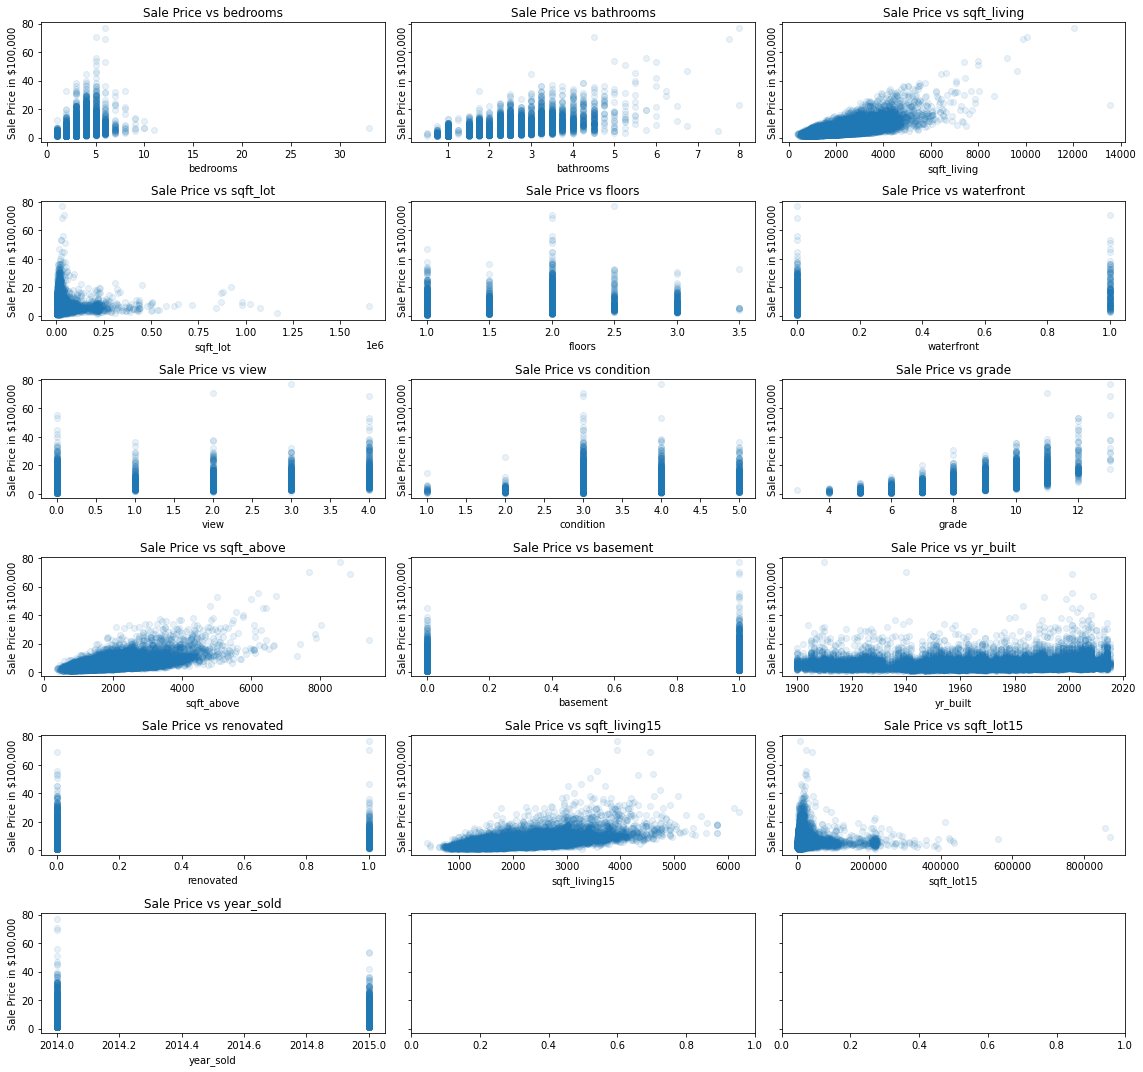

In [62]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), columns_check):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()

In [63]:
print(df['sqft_lot'].min())
print(df['sqft_lot15'].min())

520
651


Among the continous data the linearity seems good enough. Although at first sqft_lot and sqft_lot15 seems to use 0 as a placeholder for not having a lot after checking the min values we see that is not the case.

# Question - How will dealing with multicollinearity and creating dummy variables change the model R-squared?

##  Multicollinearity and Categorical Data.

Before we create dummies variables for the categorical data I will find which variables have high multicollinearity.

In [64]:
df_cor = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_cor
df_cor['pairs'] = list(zip(df_cor.level_0, df_cor.level_1))

df_cor.set_index(['pairs'], inplace = True)

df_cor.drop(columns=['level_1', 'level_0'], inplace = True)

#cc for correlation coefficient
df_cor.columns = ['cc']
df_cor.drop_duplicates(inplace=True)
df_cor[(df_cor.cc>.75) & (df_cor.cc<1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876533
"(grade, sqft_living)",0.762477
"(grade, sqft_above)",0.756221
"(sqft_living15, sqft_living)",0.756186
"(bathrooms, sqft_living)",0.755522


I will get rid of the sqft_above column as this would get rid of the 0.87 correlation between the home square footage(sqft_living) and above ground footage(sqft_above). The correlation between grade and sqft_above would also be gone, leaving us with 3 correlations with a coefficient just slightly above 0.75.

In [65]:
df.drop(columns=['sqft_above'], inplace = True)

#Check the correlation again
df_cor = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_cor
df_cor['pairs'] = list(zip(df_cor.level_0, df_cor.level_1))

df_cor.set_index(['pairs'], inplace = True)

df_cor.drop(columns=['level_1', 'level_0'], inplace = True)
df_cor.columns = ['cc']
df_cor.drop_duplicates(inplace=True)
df_cor[(df_cor.cc>.75) & (df_cor.cc<1)]

,cc
pairs,
"(sqft_living, grade)",0.762477
"(sqft_living, sqft_living15)",0.756186
"(bathrooms, sqft_living)",0.755522


Next we will see what type of data is in each column. We do this by plotting a scatter plot against our target for each column.

<bound method Figure.tight_layout of <Figure size 1152x1008 with 20 Axes>>

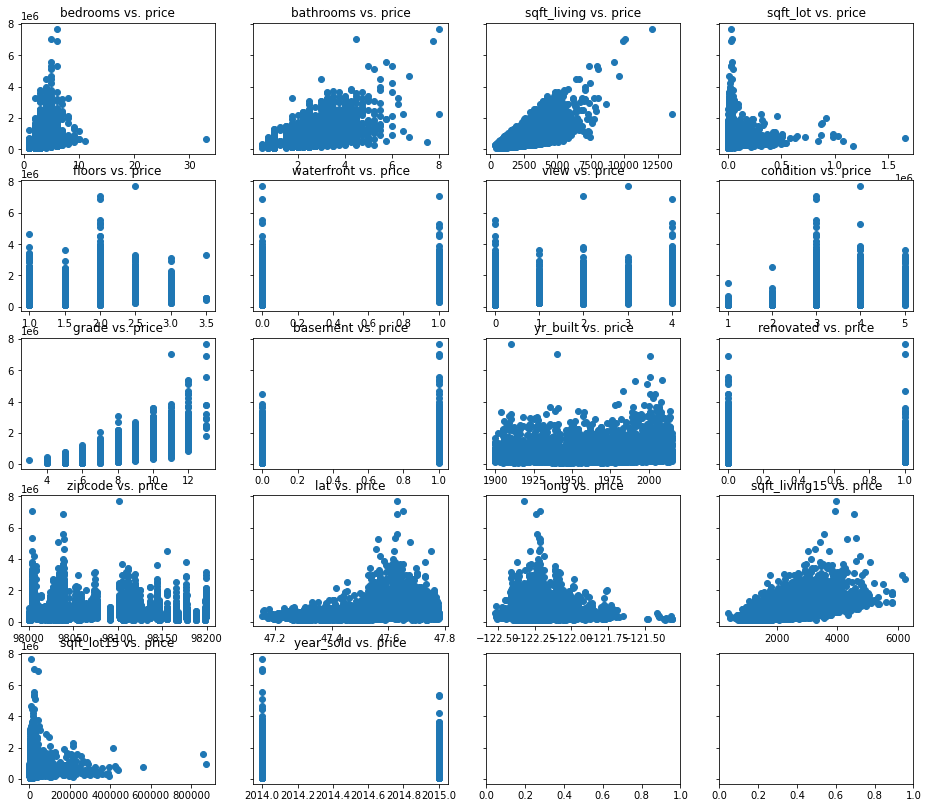

In [66]:
fig, ax = plt.subplots(nrows=5, ncols=4, figsize=(16,14), sharey=True)
columns_plot = df.drop(['id', 'price'], axis=1).columns
for col, ax in zip(columns_plot, ax.flatten()):
    ax.scatter(df[col], df['price'])
    ax.set_title(f'{col} vs. price')
fig.tight_layout

The clear cut continous data are sqft_living, sqft_lot, sqft_living15 and sqft_lot15.

The variables bedrooms, bathrooms, floors, condition, grade, yr_built and year_sold can be classify as categorical data but since the numerical values have a hierarchical order, I don't believe there is a need to create dummy variables for them.

I have already previously change the renovated and basement columns into binary data so there is no need to create dummy variables for them either along with the waterfront column. 

That leaves the zipcode, latitude and longitude columns. Since all three columns deals with location, I will get rid of the latitude and longitude columns.




In [67]:
# Drop the latitude and longitude columns.
df.drop(['long', 'lat'], axis=1, inplace=True)
print(f'Num of unique zipcodes: {df.zipcode.nunique()}')
print(f'Zipcod Max Value      : {df.zipcode.max()}')
print(f'Zipcod Min Value      : {df.zipcode.min()}')


Num of unique zipcodes: 70
Zipcod Max Value      : 98199
Zipcod Min Value      : 98001


Although I originally tried to bin the zipcodes into equal parts of 10 groups, the model build from it had a horrible R-squared and keeps getting worse. So I have believe that the best method is to just create 70 diffrent dummy variables for the zipcodes. If I wanted to decrease the number of features, I could bin the zipcodes by counties but finding this info was difficult.

In [68]:
# Create dummy variables, drop 1 column to avoid multicollinearity. This column will be accounted for in the intercept
zipcode_dummies = pd.get_dummies(df['zipcode'], prefix = 'zip', drop_first=True)

# Drop the zipcode column
df.drop(columns=['zipcode'], inplace=True)

# Adding the zipcode dummy variables
df = pd.concat([df, zipcode_dummies], axis=1)

# Checking if the new columns have been added. Now there are 86 columns
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0,0,0,0,0,0,0,0,0,0


# 2nd Model after dealing with multicollinearity and categorical data.

Now that we have gotten rid of some columns and created dummy variables for zip code let try to create the model again.

In [69]:
predictors = df.drop(['price','id'], axis=1)
predictors_int = sm.add_constant(predictors)

model = sm.OLS(df['price'],predictors_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     1073.
Date:                Tue, 27 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:25:59   Log-Likelihood:            -2.8720e+05
No. Observations:               21420   AIC:                         5.746e+05
Df Residuals:                   21335   BIC:                         5.752e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.791e+07   4.79e+06    -12.094      0.000   -6.73e+07   -4.85e+07
bedrooms      -2.776e+04   1552.493    -17.883      0.000   -3.08e+04   -2.47e+04
bathrooms      2.597e+04   2667.824      9.735      0.000    2.07e+04    3.12e+04
sqft_living     190.3969      2.791     68.211      0.000     184.926     195.868
sqft_lot          0.2455      0.039      6.364      0.000       0.170       0.321
floors         -3.56e+04   3053.179    -11.660      0.000   -4.16e+04   -2.96e+04
waterfront     6.869e+05   1.48e+04     46.522      0.000    6.58e+05    7.16e+05
view           5.329e+04   1738.211     30.658      0.000    4.99e+04    5.67e+04
condition      2.503e+04   1936.055     12.926      0.000    2.12e+04    2.88e+04
grade          6.228e+04   1813.343     34.343      0.000    5.87e+04    6.58e+04
basement      -5.507e+04   2824.916    -19.494      0.000   -6.06e+04   -4.95e+04
yr_built       -761.2492     64.638    -11.777      0.000    -887.945    -634.553
renovated      3.722e+04   6429.627      5.788      0.000    2.46e+04    4.98e+04
sqft_living15    14.0223      2.896      4.842      0.000       8.346      19.699
sqft_lot15       -0.1454      0.061     -2.396      0.017      -0.264      -0.026
year_sold      2.923e+04   2376.087     12.301      0.000    2.46e+04    3.39e+04
zip_98002       2.66e+04   1.44e+04      1.854      0.064   -1529.000    5.47e+04
zip_98003     -1.901e+04   1.29e+04     -1.469      0.142   -4.44e+04    6351.443
zip_98004      7.684e+05   1.27e+04     60.714      0.000    7.44e+05    7.93e+05
zip_98005      2.951e+05   1.52e+04     19.356      0.000    2.65e+05    3.25e+05
zip_98006      2.559e+05   1.14e+04     22.348      0.000    2.33e+05    2.78e+05
zip_98007      2.376e+05   1.62e+04     14.683      0.000    2.06e+05    2.69e+05
zip_98008      2.458e+05   1.29e+04     19.054      0.000    2.21e+05    2.71e+05
zip_98010      6.921e+04   1.84e+04      3.760      0.000    3.31e+04    1.05e+05
zip_98011      1.213e+05   1.44e+04      8.412      0.000     9.3e+04     1.5e+05
zip_98014      1.028e+05   1.72e+04      5.992      0.000    6.92e+04    1.36e+05
zip_98019      8.969e+04   1.46e+04      6.161      0.000    6.12e+04    1.18e+05
zip_98022     -1.386e+04   1.38e+04     -1.007      0.314   -4.09e+04    1.31e+04
zip_98023     -3.457e+04   1.12e+04     -3.079      0.002   -5.66e+04   -1.26e+04
zip_98024      1.574e+05   2.03e+04      7.748      0.000    1.18e+05    1.97e+05
zip_98027       1.66e+05   1.18e+04     14.105      0.000    1.43e+05    1.89e+05
zip_98028       1.15e+05   1.29e+04      8.940      0.000    8.98e+04     1.4e+05
zip_98029      2.059e+05   1.25e+04     16.452      0.000    1.81e+05     2.3e+05
zip_98030      2098.7797   1.33e+04      0.158      0.874   -2.39e+04    2.81e+04
zip_98031      1.094e+04    1.3e+04      0.842   

The Adjusted R-Squared increased a lot. The skewness and kurtosis are better. First I will create this model again in Scikit.

In [70]:
y = df['price']
X = df.drop(['id', 'price'], axis=1)

# Split data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

# Fit the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
mse = make_scorer(mean_squared_error)

# Create K-fold with 10 splits
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

# Find R-squared and MSE
rsquared = np.mean(cross_val_score(linreg, X, y, scoring='r2', cv=crossvalidation))
cv_10_results = cross_val_score(linreg, X, y, cv=crossvalidation, scoring=mse)

#Predict data
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
#Calculate two diffrent MSE
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:  ', train_mse)
print('Test Mean Squarred Error:   ', test_mse)

print(f'R-squared                    = {rsquared}')
print(f'Mean Squared Error using CV  = {cv_10_results.mean()}')



Train Mean Squarred Error:   26708931318.029816
Test Mean Squarred Error:    23027691661.323074
R-squared                    = 0.8060306568849398
Mean Squared Error using CV  = 26354220450.29137


Again we see that the R-squared got better and the MSE for the test data is actually less than the training data.

Next I will try to log transform and normalize the continous variables to see if that can improve the model.

## Answer - Creating the dummy variables for zipcodes improved R-squared alot.

# Question Will removing outliers improve the model?

In [71]:
continous_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'condition', 'grade', 
           'sqft_living15', 'sqft_lot15', 'price']
for col in continous_columns:
    print(col)
    print(df[col].quantile([.0, .01, .02, .03, .04, .05, .95, .96, .97, .98, .99, 1]), '\n\n')

bedrooms
0.00     1.0
0.01     2.0
0.02     2.0
0.03     2.0
0.04     2.0
0.05     2.0
0.95     5.0
0.96     5.0
0.97     5.0
0.98     5.0
0.99     6.0
1.00    33.0
Name: bedrooms, dtype: float64 


bathrooms
0.00    0.50
0.01    1.00
0.02    1.00
0.03    1.00
0.04    1.00
0.05    1.00
0.95    3.50
0.96    3.50
0.97    3.50
0.98    3.75
0.99    4.25
1.00    8.00
Name: bathrooms, dtype: float64 


sqft_living
0.00      370.0
0.01      720.0
0.02      790.0
0.03      850.0
0.04      900.0
0.05      940.0
0.95     3770.0
0.96     3930.0
0.97     4140.0
0.98     4410.0
0.99     4980.0
1.00    13540.0
Name: sqft_living, dtype: float64 


sqft_lot
0.00        520.00
0.01       1012.19
0.02       1182.38
0.03       1303.00
0.04       1487.00
0.05       1800.00
0.95      43560.00
0.96      50954.36
0.97      67518.00
0.98     107157.00
0.99     213008.00
1.00    1651359.00
Name: sqft_lot, dtype: float64 


floors
0.00    1.0
0.01    1.0
0.02    1.0
0.03    1.0
0.04    1.0
0.05    1.0
0.95    2

Looking at the Max and Min quantile, I can see that there are quiet a few outliers. I will use the IQR method to remove outliers from all the continous data.


In [72]:
# #Drop the absolute extreme outliers.
df2 = df.copy()

Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
lower_range = Q1-(1.5*IQR)
upper_range = Q3+(1.5*IQR)
for col in continous_columns:
    df2[col] = df2[col].map(lambda x: None if x > upper_range[col] else x)
    df2[col] = df2[col].map(lambda x: None if x < lower_range[col] else x)

# dropping rows with null values
df2 = df2.dropna()

In [73]:
for col in continous_columns:
    print(col)
    print(df[col].quantile([.0, .01, .02, .03, .04, .05, .95, .96, .97, .98, .99, 1]), '\n\n')

bedrooms
0.00     1.0
0.01     2.0
0.02     2.0
0.03     2.0
0.04     2.0
0.05     2.0
0.95     5.0
0.96     5.0
0.97     5.0
0.98     5.0
0.99     6.0
1.00    33.0
Name: bedrooms, dtype: float64 


bathrooms
0.00    0.50
0.01    1.00
0.02    1.00
0.03    1.00
0.04    1.00
0.05    1.00
0.95    3.50
0.96    3.50
0.97    3.50
0.98    3.75
0.99    4.25
1.00    8.00
Name: bathrooms, dtype: float64 


sqft_living
0.00      370.0
0.01      720.0
0.02      790.0
0.03      850.0
0.04      900.0
0.05      940.0
0.95     3770.0
0.96     3930.0
0.97     4140.0
0.98     4410.0
0.99     4980.0
1.00    13540.0
Name: sqft_living, dtype: float64 


sqft_lot
0.00        520.00
0.01       1012.19
0.02       1182.38
0.03       1303.00
0.04       1487.00
0.05       1800.00
0.95      43560.00
0.96      50954.36
0.97      67518.00
0.98     107157.00
0.99     213008.00
1.00    1651359.00
Name: sqft_lot, dtype: float64 


floors
0.00    1.0
0.01    1.0
0.02    1.0
0.03    1.0
0.04    1.0
0.05    1.0
0.95    2

# 3rd model after removing outliers

In [74]:
predictors = df2.drop(['price','id'], axis=1)
predictors_int = sm.add_constant(predictors)

model = sm.OLS(df2['price'],predictors_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     982.0
Date:                Tue, 27 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:26:10   Log-Likelihood:            -2.1118e+05
No. Observations:               16647   AIC:                         4.225e+05
Df Residuals:                   16562   BIC:                         4.232e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.413e+07   2.64e+06    -16.746      0.000   -4.93e+07    -3.9e+07
bedrooms      -2545.1549   1034.599     -2.460      0.014   -4573.080    -517.230
bathrooms      1.228e+04   1603.315      7.660      0.000    9138.657    1.54e+04
sqft_living     105.0645      1.924     54.597      0.000     101.293     108.836
sqft_lot          1.2394      0.384      3.229      0.001       0.487       1.992
floors        -4903.1275   1832.043     -2.676      0.007   -8494.127   -1312.128
waterfront     2.643e+05   1.98e+04     13.362      0.000    2.26e+05    3.03e+05
view           3.224e+04   1173.047     27.484      0.000    2.99e+04    3.45e+04
condition       2.39e+04   1087.900     21.971      0.000    2.18e+04     2.6e+04
grade          4.506e+04   1203.407     37.443      0.000    4.27e+04    4.74e+04
basement      -1.958e+04   1608.367    -12.172      0.000   -2.27e+04   -1.64e+04
yr_built       -511.9007     37.352    -13.705      0.000    -585.115    -438.686
renovated      3.932e+04   3863.021     10.179      0.000    3.17e+04    4.69e+04
sqft_living15    35.5442      1.945     18.271      0.000      31.731      39.357
sqft_lot15        0.2948      0.457      0.646      0.518      -0.600       1.190
year_sold       2.22e+04   1307.195     16.984      0.000    1.96e+04    2.48e+04
zip_98002      1.268e+04   7581.279      1.673      0.094   -2177.471    2.75e+04
zip_98003      1417.9597   6846.581      0.207      0.836    -1.2e+04    1.48e+04
zip_98004      5.145e+05   8301.054     61.982      0.000    4.98e+05    5.31e+05
zip_98005      3.258e+05   8888.736     36.653      0.000    3.08e+05    3.43e+05
zip_98006      2.643e+05   6575.248     40.196      0.000    2.51e+05    2.77e+05
zip_98007      2.407e+05   8788.183     27.394      0.000    2.24e+05    2.58e+05
zip_98008      2.377e+05   6892.592     34.492      0.000    2.24e+05    2.51e+05
zip_98010      7.921e+04   1.34e+04      5.903      0.000    5.29e+04    1.06e+05
zip_98011      1.455e+05   7616.306     19.105      0.000    1.31e+05     1.6e+05
zip_98014      1.026e+05   1.39e+04      7.369      0.000    7.53e+04     1.3e+05
zip_98019        9.8e+04   8225.950     11.913      0.000    8.19e+04    1.14e+05
zip_98022      2864.5360   8107.948      0.353      0.724    -1.3e+04    1.88e+04
zip_98023     -1.402e+04   6005.501     -2.335      0.020   -2.58e+04   -2249.641
zip_98024      1.389e+05   1.74e+04      7.990      0.000    1.05e+05    1.73e+05
zip_98027       2.31e+05   7279.238     31.733      0.000    2.17e+05    2.45e+05
zip_98028      1.296e+05   6874.749     18.851      0.000    1.16e+05    1.43e+05
zip_98029      2.346e+05   6772.114     34.646      0.000    2.21e+05    2.48e+05
zip_98030      7218.6675   6948.392      1.039      0.299   -6400.926    2.08e+04
zip_98031      1.176e+04   6864.728      1.713   

### Answer - Removing the outliers also improved R-squared by around .30. Next I wil try log transforming and scaling the data.


# Question-  Will log transforming and scaling the continous data create a better fit?

First I will create a distplot to find the distribrution of the continous data. I will create a kde graph with smoothing to plot the other numerical columns.

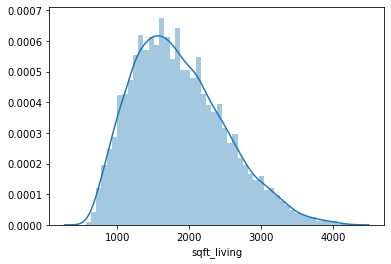

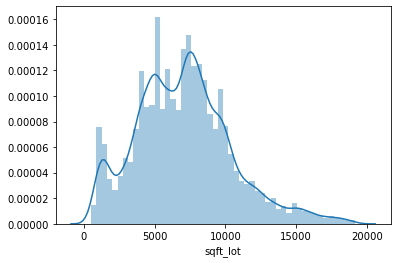

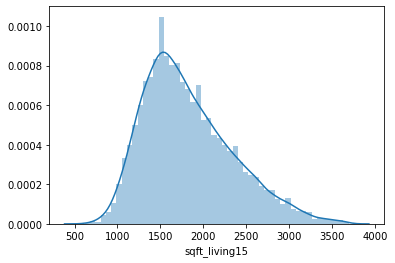

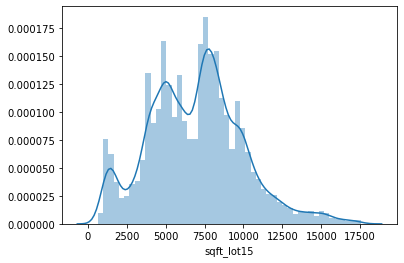

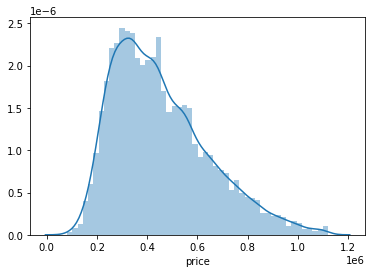

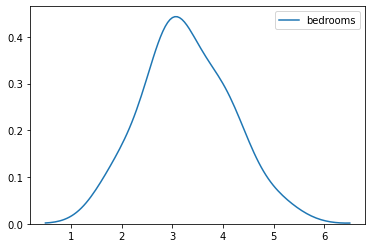

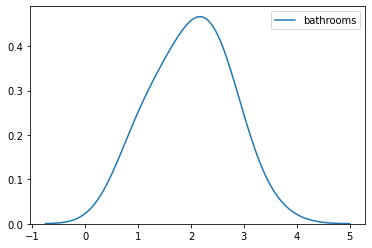

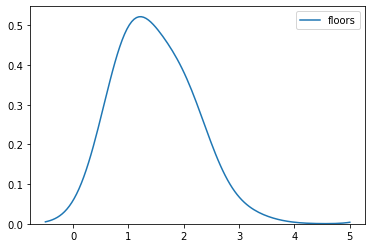

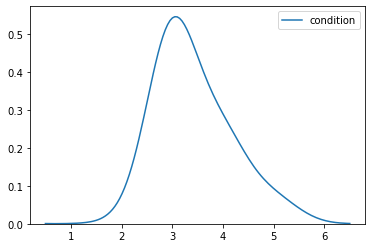

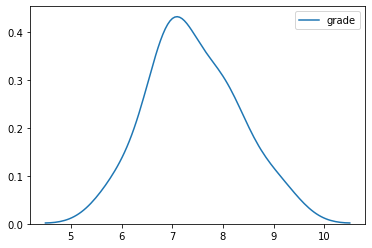

<Figure size 432x288 with 0 Axes>

In [75]:
continous_data = ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'price']
kde_plt = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade']
          
for col in continous_data:    
    sns.distplot(df2[col], label=col)
    plt.figure()

for col in kde_plt:
    sns.kdeplot(df2[col], bw=0.5)
    plt.figure()

All five continous data seems to be skewed to the right. The rest of the columns seems to be fine, with just slight skewnees.

In [76]:
df3 =df2.copy()

In [77]:
non_normal = ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'price']
for col in non_normal:
    df3[col] = df3[col].map(lambda x: np.log(x))

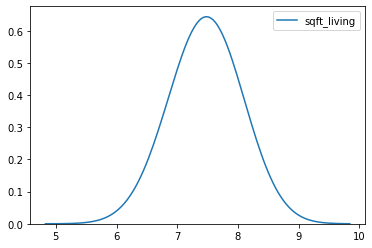

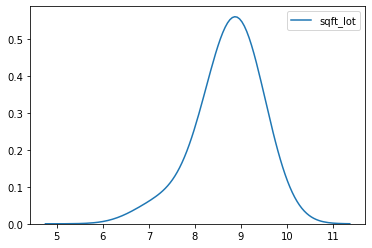

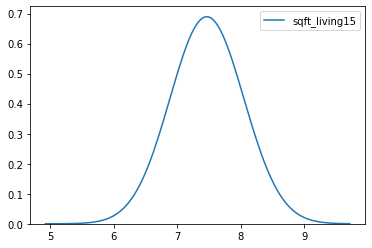

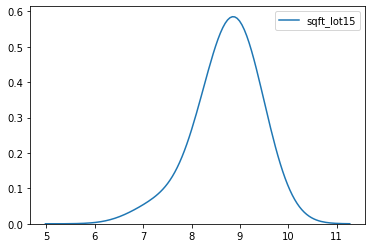

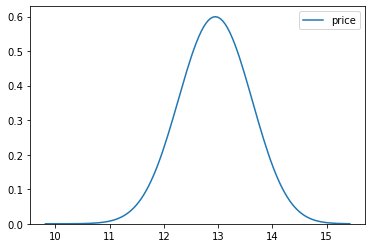

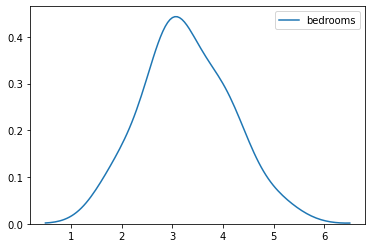

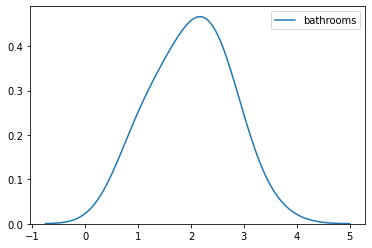

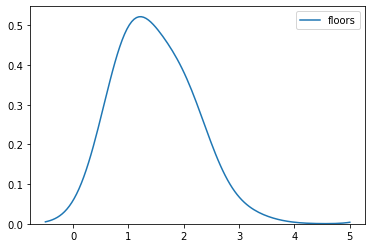

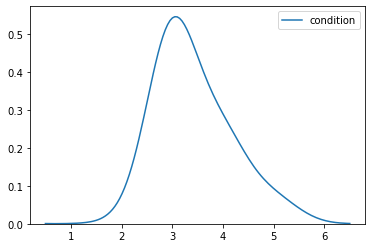

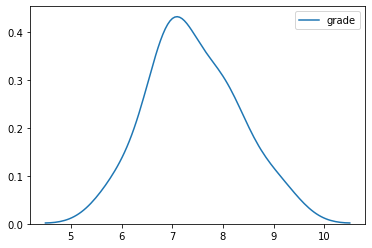

<Figure size 432x288 with 0 Axes>

In [78]:
for col in continous_data:    
    sns.kdeplot(df3[col], bw=0.5)
    plt.figure()

for col in kde_plt:
    sns.kdeplot(df3[col], bw=0.5)
    plt.figure()

All the data seems closer to being normally distribruted now. Next I will rename the columns to make sure which are logs and then scale all the data.

# Scaling with Normalization

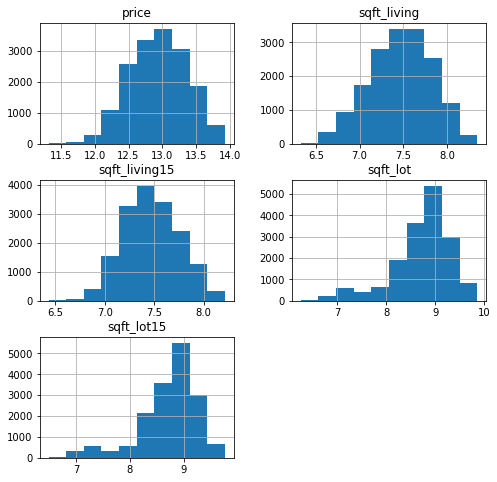

In [79]:
to_scale = ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'price']
df3[to_scale].hist(figsize  = [8, 8]);


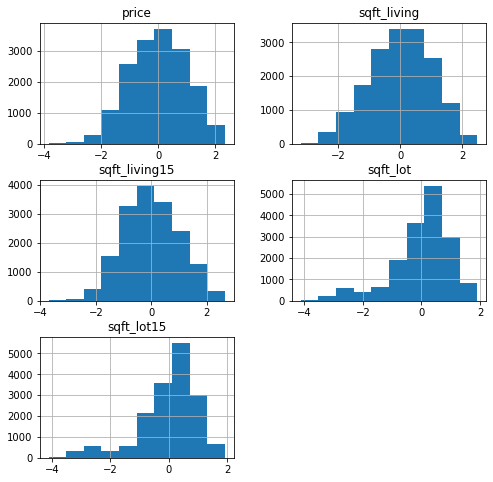

In [80]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

for col in to_scale:
    df3[col] = normalize(df3[col])
# Rename the columns so it is clear the data is log-transform and scaled.    
df3[to_scale].hist(figsize  = [8, 8]);

df3.rename(columns={'sqft_living': 'nl_sqft_living', 'sqft_lot': 'nl_sqft_lot', 'sqft_living15': 'nl_sqft_living15', 
                    'sqft_lot15': 'nl_sqft_lot15', 'price': 'nl_price'}, inplace=True)

The data is now scaled with normalization method. Now we will build the model again and see how it peforms.
# 4th Model after log transforming and normalization

In [81]:
predictors = df3.drop(['nl_price','id'], axis=1)
predictors_int = sm.add_constant(predictors)

model = sm.OLS(df3['nl_price'],predictors_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               nl_price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     1153.
Date:                Tue, 27 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:26:15   Log-Likelihood:                -7606.8
No. Observations:               16647   AIC:                         1.538e+04
Df Residuals:                   16562   BIC:                         1.604e+04
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -232.0532     12.882    -18.013      0.000    -257.304    -206.803
bedrooms            -0.0214      0.005     -4.164      0.000      -0.031      -0.011
bathrooms            0.0758      0.008      9.550      0.000       0.060       0.091
nl_sqft_living       0.3204      0.006     50.054      0.000       0.308       0.333
nl_sqft_lot          0.0843      0.008     10.645      0.000       0.069       0.100
floors               0.0147      0.010      1.531      0.126      -0.004       0.033
waterfront           1.2975      0.097     13.426      0.000       1.108       1.487
view                 0.1270      0.006     22.224      0.000       0.116       0.138
condition            0.1183      0.005     22.231      0.000       0.108       0.129
grade                0.2187      0.006     37.338      0.000       0.207       0.230
basement            -0.0820      0.008     -9.996      0.000      -0.098      -0.066
yr_built            -0.0010      0.000     -5.052      0.000      -0.001      -0.001
renovated            0.1670      0.019      8.836      0.000       0.130       0.204
nl_sqft_living15     0.1139      0.005     23.390      0.000       0.104       0.123
nl_sqft_lot15        0.0005      0.008      0.064      0.949      -0.014       0.015
year_sold            0.1145      0.006     17.920      0.000       0.102       0.127
zip_98002            0.0194      0.037      0.523      0.601      -0.053       0.092
zip_98003            0.0491      0.033      1.466      0.143      -0.017       0.115
zip_98004            2.5187      0.041     62.060      0.000       2.439       2.598
zip_98005            1.8037      0.043     41.504      0.000       1.719       1.889
zip_98006            1.5334      0.032     47.716      0.000       1.470       1.596
zip_98007            1.5356      0.043     35.726      0.000       1.451       1.620
zip_98008            1.5445      0.034     45.794      0.000       1.478       1.611
zip_98010            0.4364      0.066      6.657      0.000       0.308       0.565
zip_98011            1.0860      0.037     29.170      0.000       1.013       1.159
zip_98014            0.6723      0.068      9.896      0.000       0.539       0.806
zip_98019            0.7823      0.040     19.462      0.000       0.704       0.861
zip_98022            0.0592      0.040      1.493      0.136      -0.019       0.137
zip_98023           -0.0561      0.029     -1.912      0.056      -0.114       0.001
zip_98024            1.0227      0.085     12.040      0.000       0.856       1.189
zip_98027            1.4945      0.036     41.799      0.000       1.424       1.565
zip_98028            0.9878      0.034     29.386      0.000       0.922       1.054
zip_98029            1.4919      0.033     45.097      0.000       1.427       1.557
zip_98030            0.

In [82]:
y = df3['nl_price']
X = df3.drop(['id', 'nl_price'], axis=1)

# Split data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

# Fit the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)


# Find R-squared and MSE
rsquared = np.mean(cross_val_score(linreg, X, y, scoring='r2', cv=crossvalidation))
cv_10_results = cross_val_score(linreg, X, y, cv=crossvalidation, scoring=mse)

#Predict data
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
#Calculate two diffrent MSE
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:  ', train_mse)
print('Test Mean Squarred Error:   ', test_mse)

print(f'R-squared                    = {rsquared}')
print(f'Mean Squared Error using CV  = {cv_10_results.mean()}')



Train Mean Squarred Error:   0.14680564824071174
Test Mean Squarred Error:    0.14374236720992192
R-squared                    = 0.8521258915290486
Mean Squared Error using CV  = 0.14756459116897888


The R-squared improved by .2 from the third model. The skewness have improve but kurtosis is still quiet large.

Next I will peform model fitting to see if it is necessary to get rid of some features. 

# Model Fitting

## Stepwise selection with P-value

First I will try doing a stepwise selection to see if there are features I should get rid of.

In [83]:

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [84]:
predictors = df3.drop(['nl_price','id'], axis=1)

result = stepwise_selection(predictors, df3['nl_price'], initial_list=['zip_98002', 'zip_98003', 'zip_98004',
       'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010',
       'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023',
       'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030',
       'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034', 'zip_98038',
       'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045', 'zip_98052',
       'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059',
       'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075',
       'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103', 'zip_98105',
       'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112',
       'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118', 'zip_98119',
       'zip_98122', 'zip_98125', 'zip_98126', 'zip_98133', 'zip_98136',
       'zip_98144', 'zip_98146', 'zip_98148', 'zip_98155', 'zip_98166',
       'zip_98168', 'zip_98177', 'zip_98178', 'zip_98188', 'zip_98198',
       'zip_98199'], verbose=True)
print('resulting features:')
print(result)

Add  grade                          with p-value 0.0


ValueError: list.remove(x): x not in list

# Question- Will limiting the amount of features improve the model?

In [85]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

predictors = df3.drop(['nl_price','id'], axis=1)


linreg = LinearRegression()
for i in range(5,21):
    selector = RFE(linreg, n_features_to_select=i)
    selector = selector.fit(predictors, df3['nl_price'])

    #Fit the model with selected columns
    selected_columns = X.columns[selector.support_ ]
    linreg.fit(X[selected_columns],y)
    # Predict y_hat
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)
    print(f'Number of features:  {i}')
    print(f'R-squared          : {r_squared}')
    print(f'Adjusted R-squared : {adjusted_r_squared}')
    print('\n\n')

Number of features:  5
R-squared          : 0.05833057209799419
Adjusted R-squared : 0.05804763554733561



Number of features:  6
R-squared          : 0.06844017501637756
Adjusted R-squared : 0.06810427604102287



Number of features:  7
R-squared          : 0.07506148569807236
Adjusted R-squared : 0.07467236558267398



Number of features:  8
R-squared          : 0.08683162527290833
Adjusted R-squared : 0.08639254924226658



Number of features:  9
R-squared          : 0.09370625733514681
Adjusted R-squared : 0.09321598603118675



Number of features:  10
R-squared          : 0.10379555932295259
Adjusted R-squared : 0.10325684542497404



Number of features:  11
R-squared          : 0.1154565041475315
Adjusted R-squared : 0.11487159411119985



Number of features:  12
R-squared          : 0.1367533490055045
Adjusted R-squared : 0.13613059081072676



Number of features:  13
R-squared          : 0.15434153136426743
Adjusted R-squared : 0.1536805826423132



Number of features:  14
R-s

### Answer - Limiting the number of features using RFE made the model a lot worse.

Next I will check the normality of the residuals and the homoscedasticity of the data.

# Checking Assumptions
## Normality and Homoscedasticity Check

King County Housing DataSet - Regression Analysis and Diagnostics for formula: nl_price~bedrooms
-------------------------------------------------------------------------------------


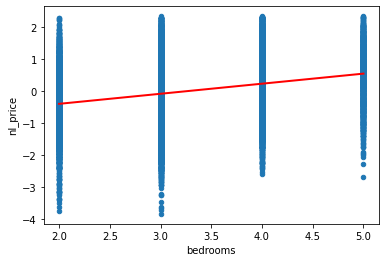

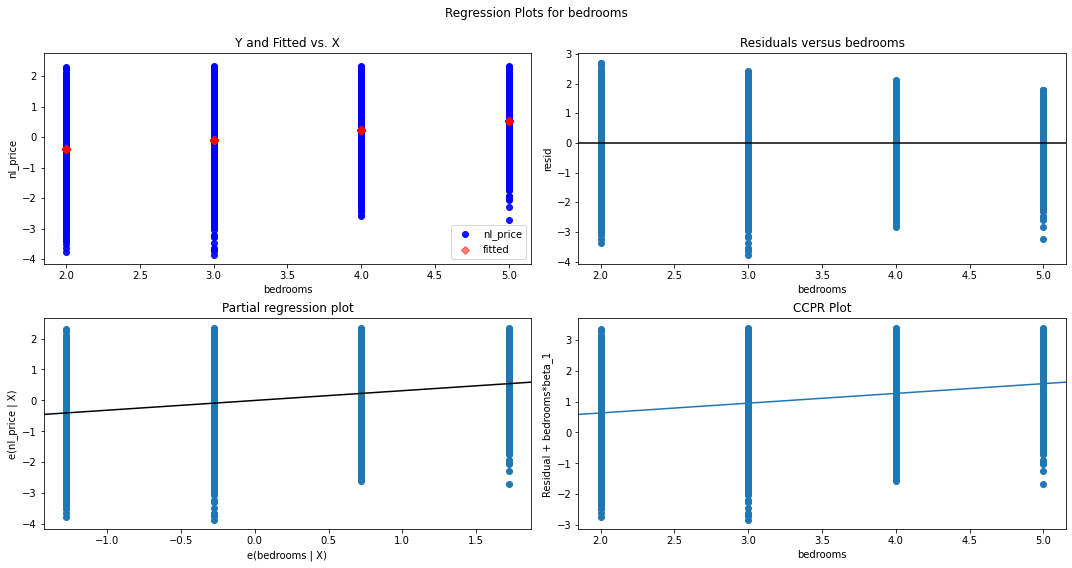

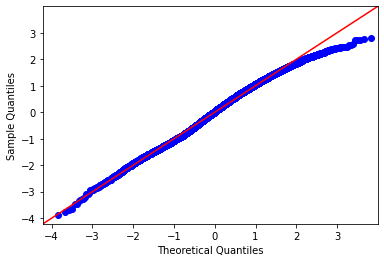

King County Housing DataSet - Regression Analysis and Diagnostics for formula: nl_price~bathrooms
-------------------------------------------------------------------------------------


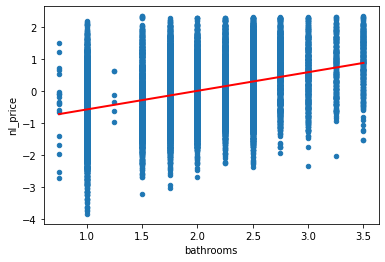

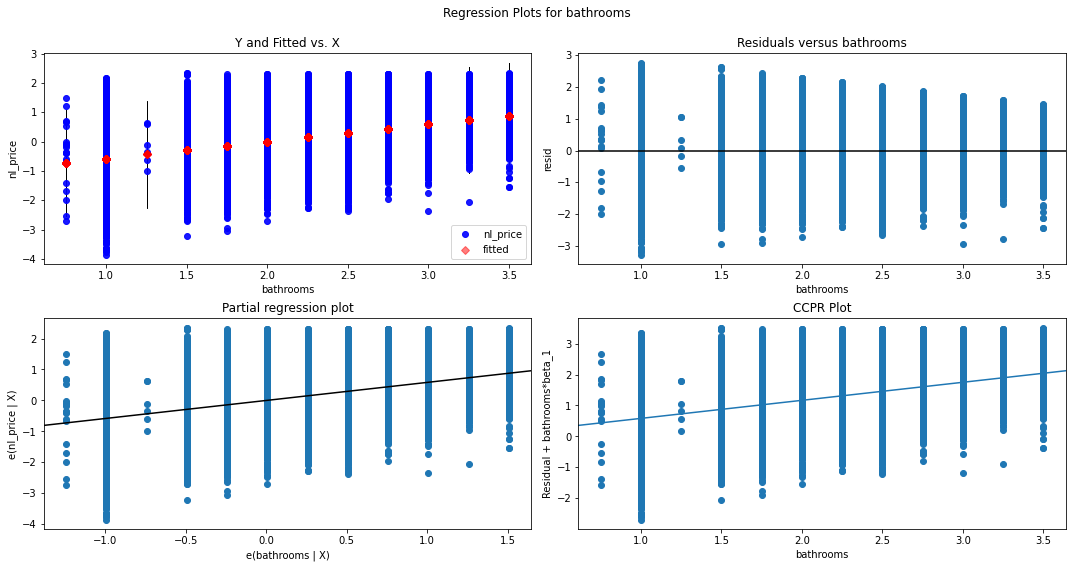

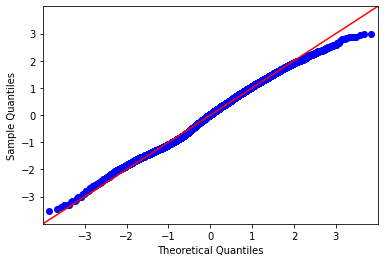

King County Housing DataSet - Regression Analysis and Diagnostics for formula: nl_price~nl_sqft_living
-------------------------------------------------------------------------------------


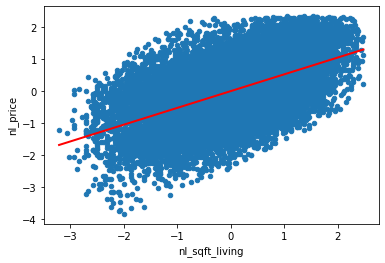

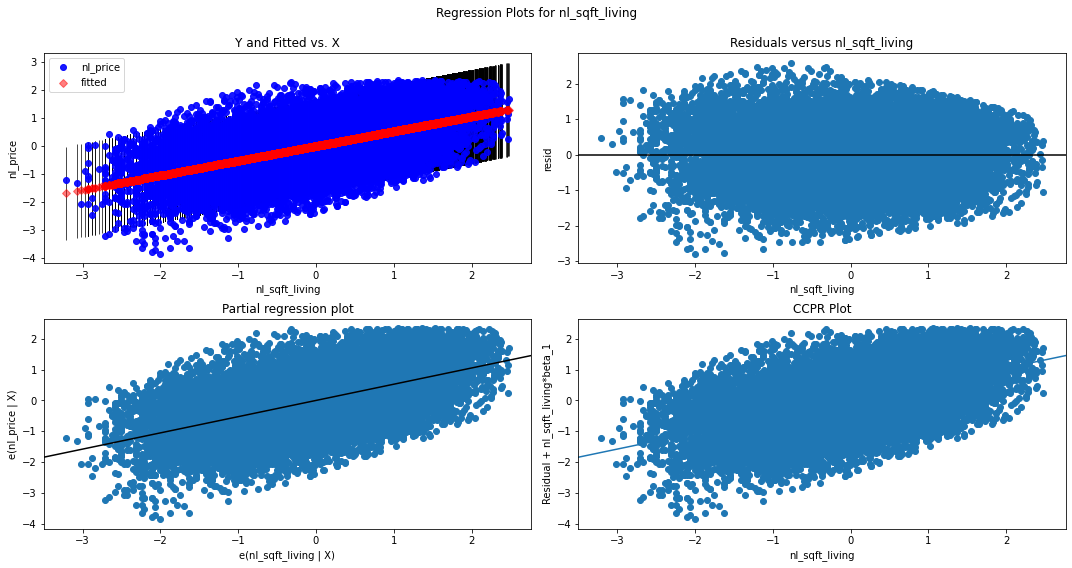

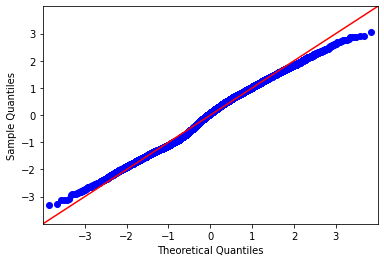

King County Housing DataSet - Regression Analysis and Diagnostics for formula: nl_price~floors
-------------------------------------------------------------------------------------


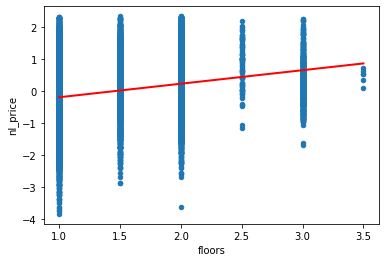

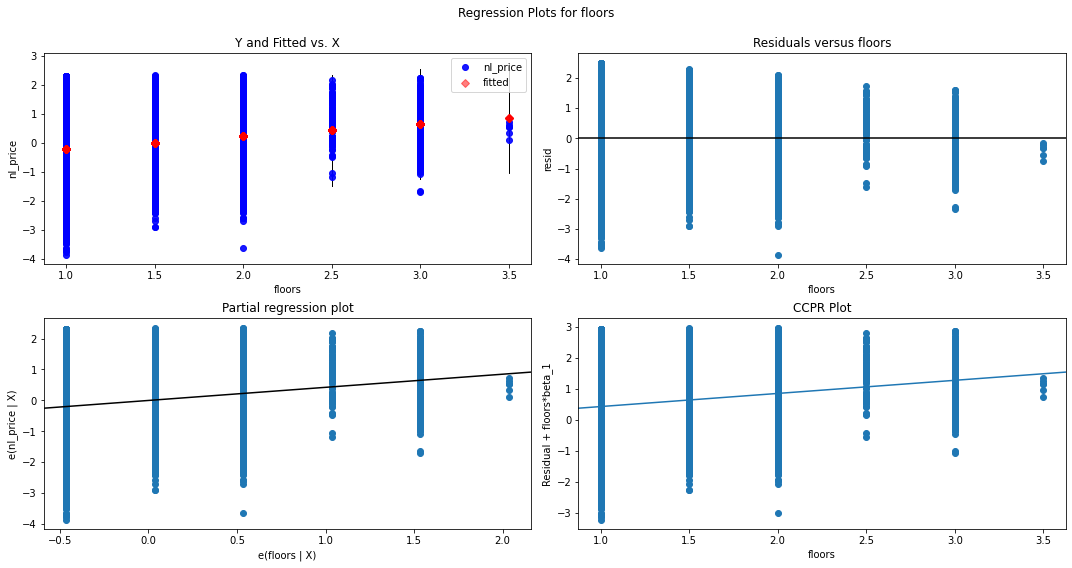

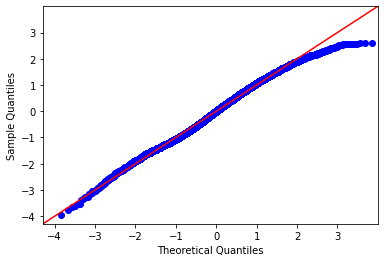

King County Housing DataSet - Regression Analysis and Diagnostics for formula: nl_price~view
-------------------------------------------------------------------------------------


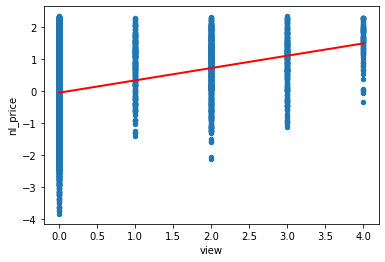

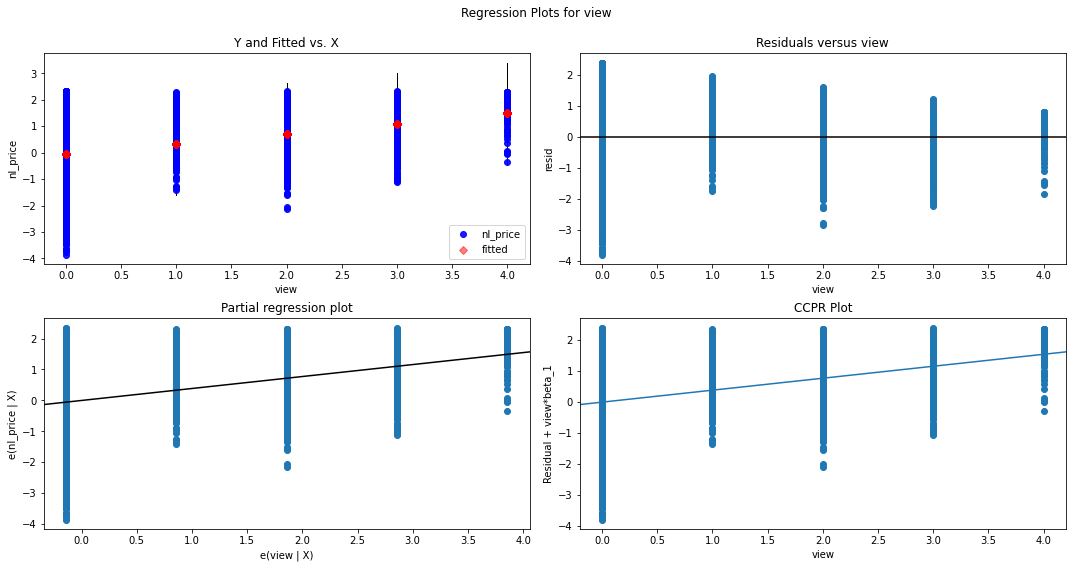

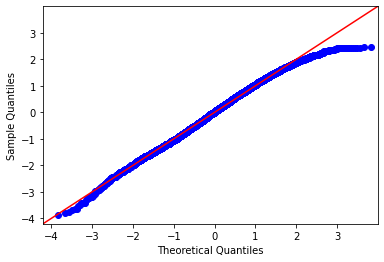

King County Housing DataSet - Regression Analysis and Diagnostics for formula: nl_price~condition
-------------------------------------------------------------------------------------


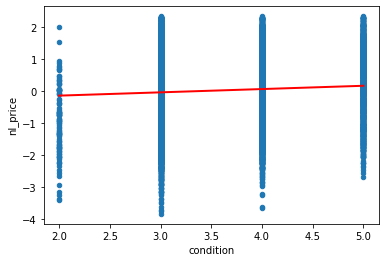

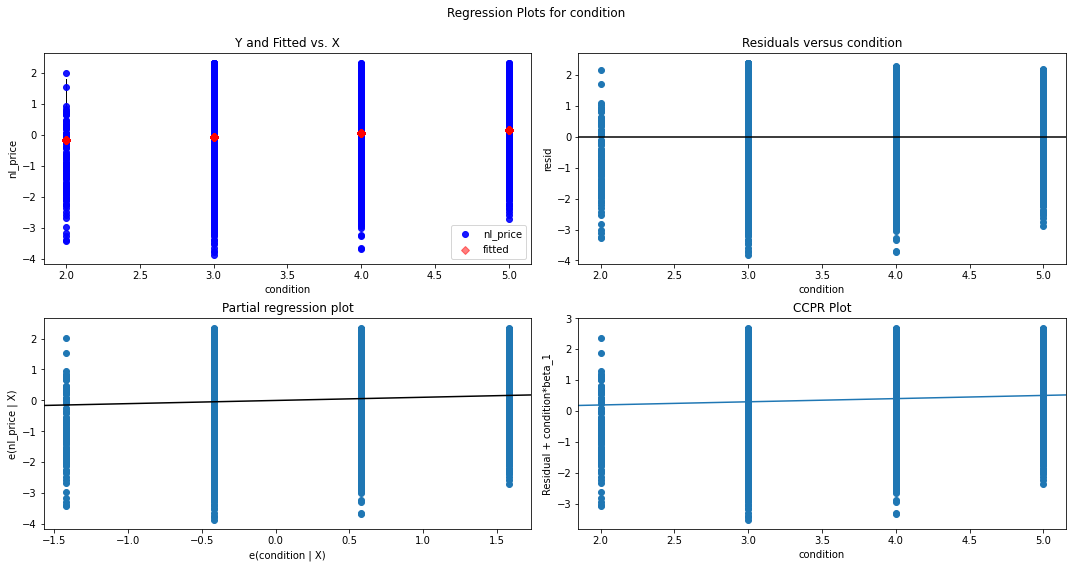

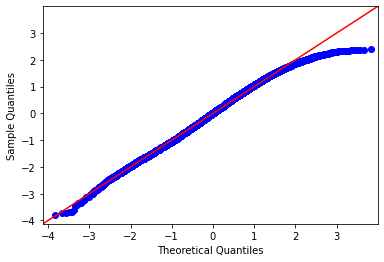

King County Housing DataSet - Regression Analysis and Diagnostics for formula: nl_price~grade
-------------------------------------------------------------------------------------


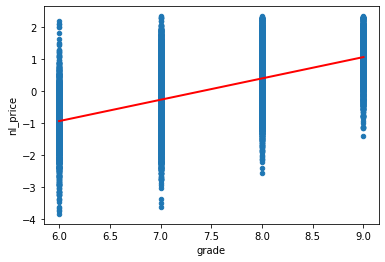

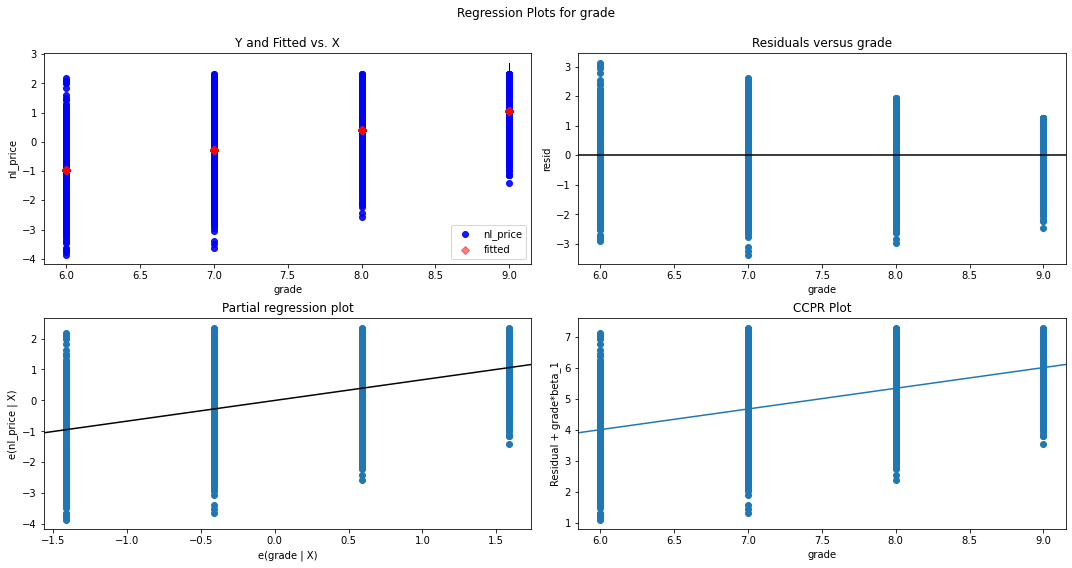

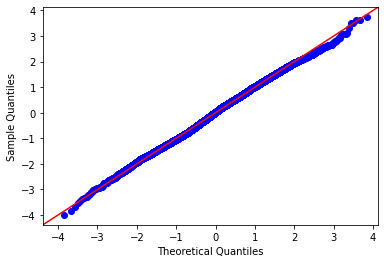

King County Housing DataSet - Regression Analysis and Diagnostics for formula: nl_price~yr_built
-------------------------------------------------------------------------------------


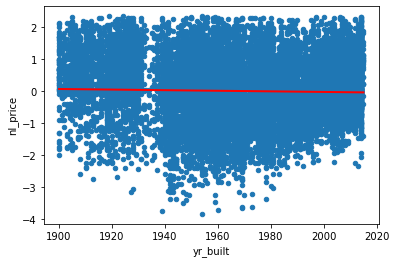

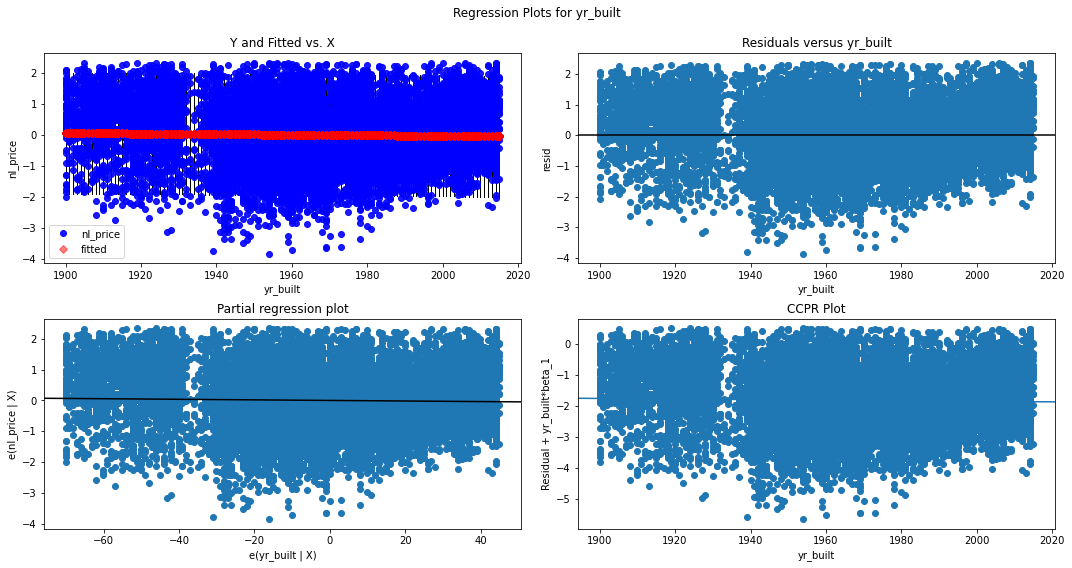

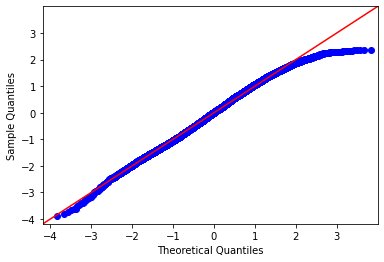

King County Housing DataSet - Regression Analysis and Diagnostics for formula: nl_price~nl_sqft_living15
-------------------------------------------------------------------------------------


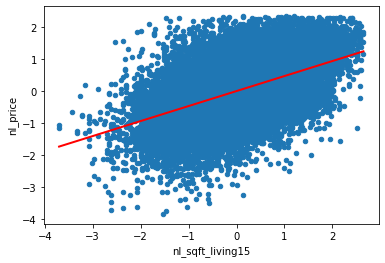

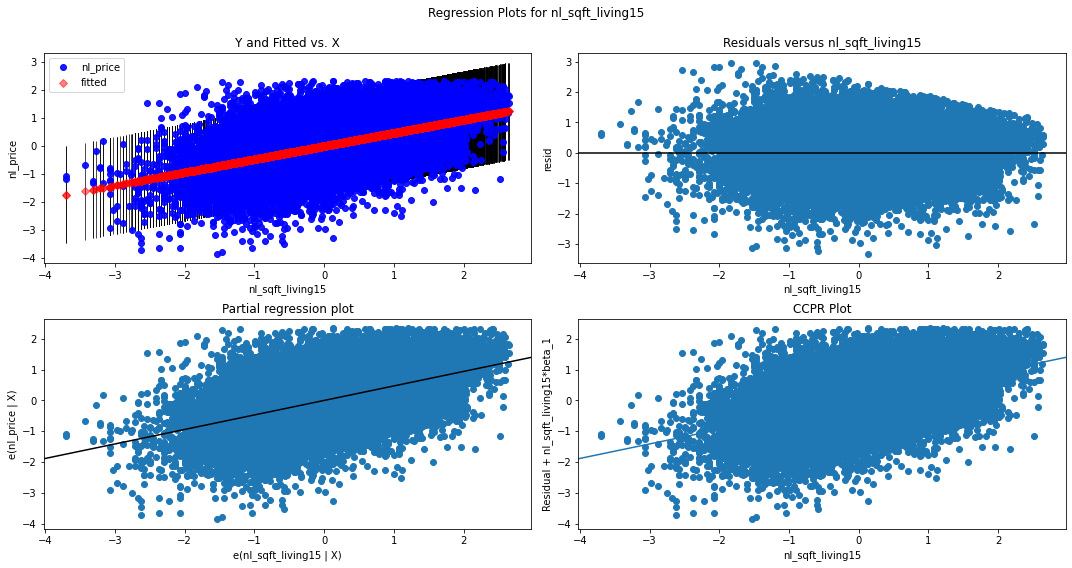

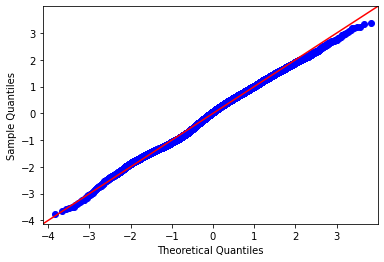

King County Housing DataSet - Regression Analysis and Diagnostics for formula: nl_price~nl_sqft_lot15
-------------------------------------------------------------------------------------


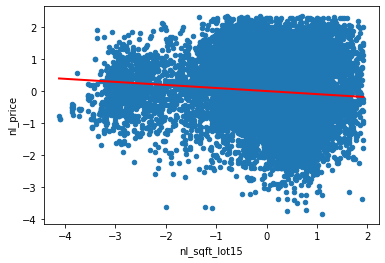

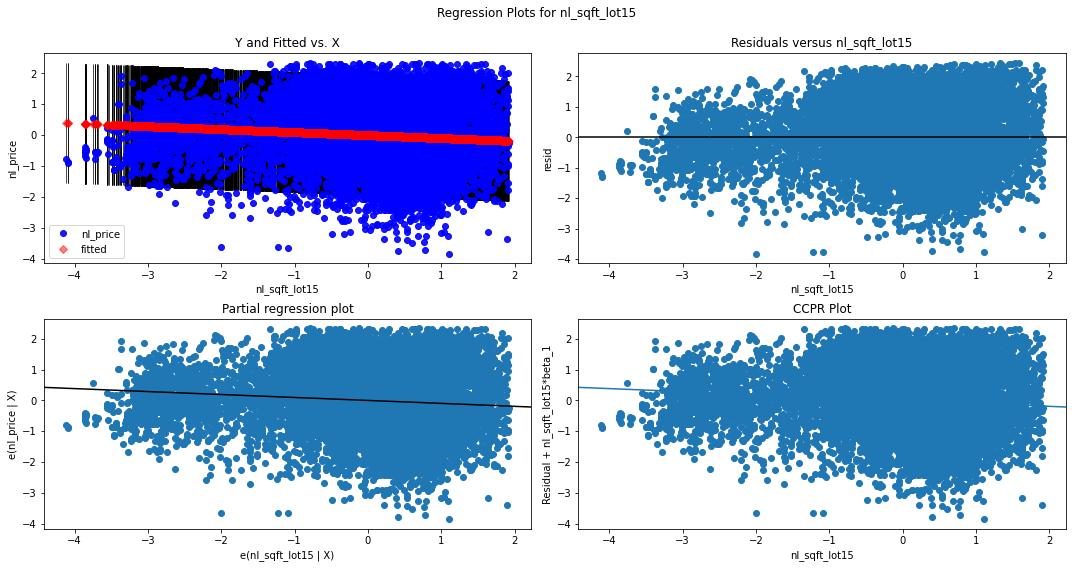

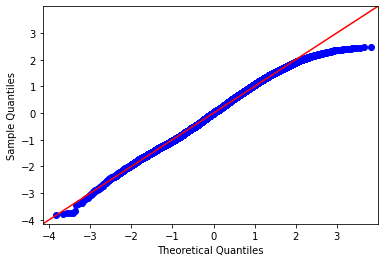

King County Housing DataSet - Regression Analysis and Diagnostics for formula: nl_price~year_sold
-------------------------------------------------------------------------------------


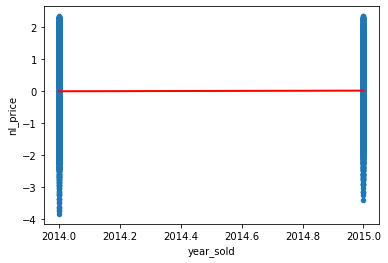

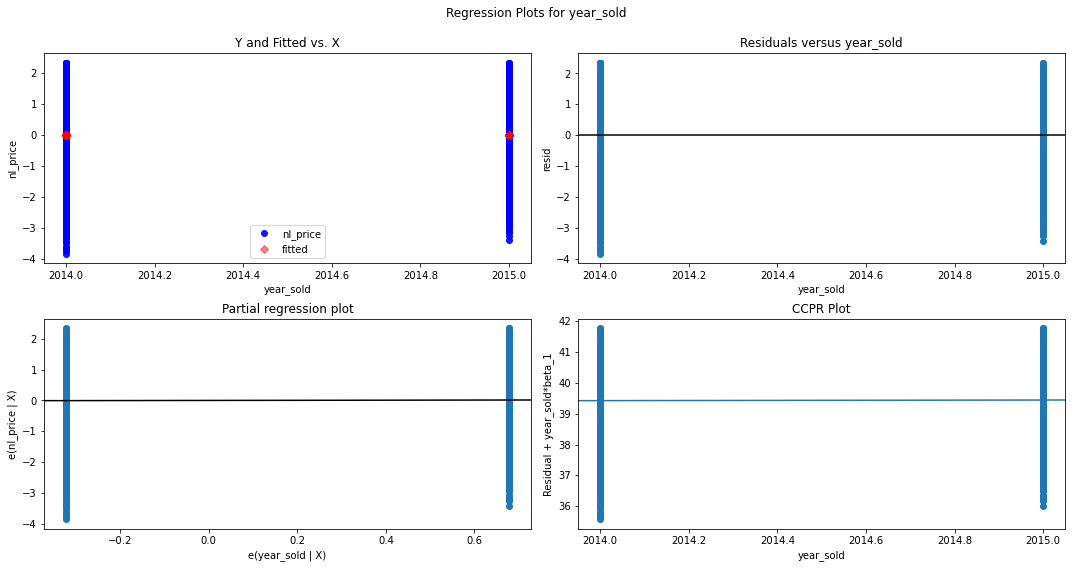

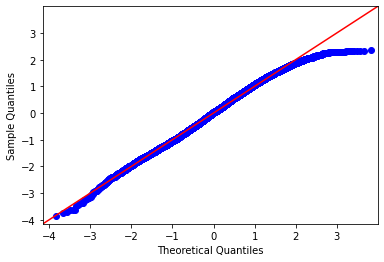

In [87]:
cols_to_check = ['bedrooms', 'bathrooms', 'nl_sqft_living', 'floors', 'view', 
                 'condition', 'grade', 'yr_built', 'nl_sqft_living15', 'nl_sqft_lot15', 'year_sold']
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)']]


for idx, val in enumerate(cols_to_check):
    print ("King County Housing DataSet - Regression Analysis and Diagnostics for formula: nl_price~" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'nl_price~' + val
#   
    model = smf.ols(formula=f, data=df3).fit()
    
    X_new = pd.DataFrame({val: [df3[val].min(), df3[val].max()]});
    preds = model.predict(X_new)
    df3.plot(kind='scatter', x=val, y='nl_price');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])

In [88]:
results = pd.DataFrame(results)
results


,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality (JB)
1,bedrooms,0.0605145,-1.03379,0.315319,5.99253e-228,180.921
2,bathrooms,0.143863,-1.16214,0.583051,0,181.975
3,nl_sqft_living,0.276221,1.18461e-13,0.525568,0,264.026
4,floors,0.0532265,-0.621114,0.423879,5.44403e-200,152.094
5,view,0.0488987,-0.0548391,0.386334,1.73179e-183,126.153
6,condition,0.0044142,-0.351822,0.102875,9.39913e-18,158.823
7,grade,0.295392,-4.95448,0.668427,0,52.4464
8,yr_built,0.00074539,1.81542,-0.000921485,0.000426752,146.326
9,nl_sqft_living15,0.220623,9.90701e-14,0.469706,0,102.179


The qq plots all show decent normality for all the variables but the JB score is horrible for all of them. Only one of the variables' JB score is under 6 which would roughly indicate normal distribrution of residuals.

The P-value for all the columns except for year_sold is 0, indicating that the variables have a relationship with the target.

Heteroskedasticity test seems fine for most of the variables except for the nl_sqft_living15 and nl_sqft_lot15.

I will drop the year_sold, nl_sqft_living15 and nl_sqft_lot15 columns.

I also dropped six zipcodes that had p-values larger than .05.

In [109]:
df4 = df3.copy()
df4.drop(['year_sold', 'nl_sqft_living15', 'nl_sqft_lot15', 'floors', 'zip_98002', 'zip_98003', 'zip_98022', 'zip_98023', 'zip_98032', 'zip_98092'], axis=1, inplace=True)

# 5th Model after dropping features showing heteroscedasticity

In [110]:
predictors = df4.drop(['nl_price','id'], axis=1)
predictors_int = sm.add_constant(predictors)

model = sm.OLS(df4['nl_price'],predictors_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               nl_price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1231.
Date:                Tue, 27 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:52:01   Log-Likelihood:                -8044.5
No. Observations:               16647   AIC:                         1.624e+04
Df Residuals:                   16572   BIC:                         1.682e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.3749      0.370     -3.716      0.000      -2.100      -0.650
bedrooms          -0.0251      0.005     -4.771      0.000      -0.035      -0.015
bathrooms          0.0813      0.008     10.178      0.000       0.066       0.097
nl_sqft_living     0.3741      0.006     62.801      0.000       0.362       0.386
nl_sqft_lot        0.0950      0.005     19.504      0.000       0.085       0.105
waterfront         1.2601      0.099     12.712      0.000       1.066       1.454
view               0.1511      0.006     26.139      0.000       0.140       0.162
condition          0.1019      0.005     18.873      0.000       0.091       0.113
grade              0.2485      0.006     42.724      0.000       0.237       0.260
basement          -0.0991      0.007    -13.639      0.000      -0.113      -0.085
yr_built          -0.0010      0.000     -5.412      0.000      -0.001      -0.001
renovated          0.1313      0.019      6.801      0.000       0.093       0.169
zip_98004          2.6012      0.036     73.252      0.000       2.532       2.671
zip_98005          1.8562      0.039     47.595      0.000       1.780       1.933
zip_98006          1.5856      0.025     63.608      0.000       1.537       1.634
zip_98007          1.5570      0.039     40.412      0.000       1.481       1.633
zip_98008          1.5583      0.027     57.476      0.000       1.505       1.611
zip_98010          0.4404      0.064      6.899      0.000       0.315       0.566
zip_98011          1.1254      0.032     35.526      0.000       1.063       1.188
zip_98014          0.6127      0.066      9.233      0.000       0.483       0.743
zip_98019          0.8319      0.035     23.512      0.000       0.763       0.901
zip_98024          0.9707      0.084     11.491      0.000       0.805       1.136
zip_98027          1.5337      0.030     51.766      0.000       1.476       1.592
zip_98028          1.0293      0.027     38.002      0.000       0.976       1.082
zip_98029          1.5134      0.026     57.770      0.000       1.462       1.565
zip_98030          0.1412      0.028      5.113      0.000       0.087       0.195
zip_98031          0.1859      0.027      6.870      0.000       0.133       0.239
zip_98033          1.8353      0.024     75.814      0.000       1.788       1.883
zip_98034          1.2878      0.020     62.968      0.000       1.248       1.328
zip_98038          0.4264      0.021     20.514      0.000       0.386       0.467
zip_98039          3.0038      0.176     17.051      0.000       2.658       3.349
zip_98040          2.1721      0.036     60.483      0.000       2.102       2.243
zip_98042          0.1664      0.021      7.777      0.000       0.124       0.208
zip_98045          0.7469      0.036     20.996      0.000       0.677       0.817
zip_98052   

In [111]:
y = df4['nl_price']
X = df4.drop(['id', 'nl_price'], axis=1)
# Split data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

# Fit the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
mse = make_scorer(mean_squared_error)

# Create K-fold with 10 splits
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

# Find R-squared and MSE
rsquared = np.mean(cross_val_score(linreg, X, y, scoring='r2', cv=crossvalidation))
cv_10_results = cross_val_score(linreg, X, y, cv=crossvalidation, scoring=mse)

#Predict data
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
#Calculate two diffrent MSE
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:  ', train_mse)
print('Test Mean Squarred Error:   ', test_mse)

print(f'R-squared                    = {rsquared}')
print(f'Mean Squared Error using CV  = {cv_10_results.mean()}')


Train Mean Squarred Error:   0.15472952502383155
Test Mean Squarred Error:    0.15146078106037475
R-squared                    = 0.8443080668639675
Mean Squared Error using CV  = 0.15537766207630008


The R-squared and MSE of the model got worse than the fourth model but since the features violate an assumption I have no choice but to leave them out and settle for the worse scores.

# The Final Multiple Linear Regression Model
### Steps taken to arrive at final model.
1. Get rid of duplicates and then replace missing and placeholder values with the mode.
2. Change columns that use 0 as placeholder into binary values.
3. Check for linear relationship assumption.
4. Deal with variables having multicollinearity.
5. Create Dummy Variables for categorical data.
6. Remove outliers from the data.
7. Log transform non-normal continous data and scaled with normalization method.
8. Perform Model Fitting using both RFE and Stepwise Selection.
9. Check distribrution of residuals for normality and heteroskedasticity.

In [112]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               nl_price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     1231.
Date:                Tue, 27 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:53:21   Log-Likelihood:                -8044.5
No. Observations:               16647   AIC:                         1.624e+04
Df Residuals:                   16572   BIC:                         1.682e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.3749      0.370     -3.716      0.000      -2.100      -0.650
bedrooms          -0.0251      0.005     -4.771      0.000      -0.035      -0.015
bathrooms          0.0813      0.008     10.178      0.000       0.066       0.097
nl_sqft_living     0.3741      0.006     62.801      0.000       0.362       0.386
nl_sqft_lot        0.0950      0.005     19.504      0.000       0.085       0.105
waterfront         1.2601      0.099     12.712      0.000       1.066       1.454
view               0.1511      0.006     26.139      0.000       0.140       0.162
condition          0.1019      0.005     18.873      0.000       0.091       0.113
grade              0.2485      0.006     42.724      0.000       0.237       0.260
basement          -0.0991      0.007    -13.639      0.000      -0.113      -0.085
yr_built          -0.0010      0.000     -5.412      0.000      -0.001      -0.001
renovated          0.1313      0.019      6.801      0.000       0.093       0.169
zip_98004          2.6012      0.036     73.252      0.000       2.532       2.671
zip_98005          1.8562      0.039     47.595      0.000       1.780       1.933
zip_98006          1.5856      0.025     63.608      0.000       1.537       1.634
zip_98007          1.5570      0.039     40.412      0.000       1.481       1.633
zip_98008          1.5583      0.027     57.476      0.000       1.505       1.611
zip_98010          0.4404      0.064      6.899      0.000       0.315       0.566
zip_98011          1.1254      0.032     35.526      0.000       1.063       1.188
zip_98014          0.6127      0.066      9.233      0.000       0.483       0.743
zip_98019          0.8319      0.035     23.512      0.000       0.763       0.901
zip_98024          0.9707      0.084     11.491      0.000       0.805       1.136
zip_98027          1.5337      0.030     51.766      0.000       1.476       1.592
zip_98028          1.0293      0.027     38.002      0.000       0.976       1.082
zip_98029          1.5134      0.026     57.770      0.000       1.462       1.565
zip_98030          0.1412      0.028      5.113      0.000       0.087       0.195
zip_98031          0.1859      0.027      6.870      0.000       0.133       0.239
zip_98033          1.8353      0.024     75.814      0.000       1.788       1.883
zip_98034          1.2878      0.020     62.968      0.000       1.248       1.328
zip_98038          0.4264      0.021     20.514      0.000       0.386       0.467
zip_98039          3.0038      0.176     17.051      0.000       2.658       3.349
zip_98040          2.1721      0.036     60.483      0.000       2.102       2.243
zip_98042          0.1664      0.021      7.777      0.000       0.124       0.208
zip_98045          0.7469      0.036     20.996      0.000       0.677       0.817
zip_98052   

### Interpreting the Model
Since the data have been log transform and scaled the coefficent can no longer be interpret in dollar amounts. We can look at the coeffiecents to see which zipcodes have the highest priced homes. We can also see that water front properties are significantly more expensive.

In [127]:
 max(y_hat_train)

2.614048563894781

Text(0.5, 1.0, 'Model vs Train Set Data')

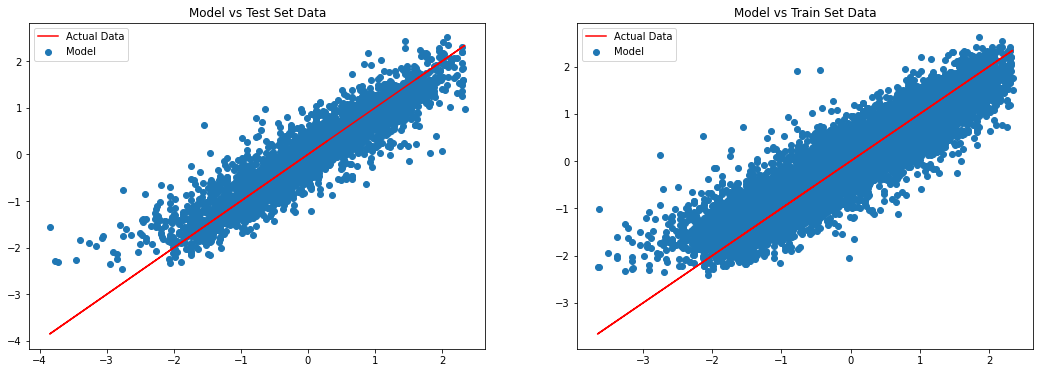

In [148]:
fig, ax = plt.subplots(1,2, figsize=(18,6))
ax[0].scatter(y_test, y_hat_test, label='Model')
ax[0].plot(y_test, y_test, color='red', label='Actual Data')
ax[0].legend()
ax[0].set_title('Model vs Test Set Data')

ax[1].scatter(y_train, y_hat_train, label='Model')
ax[1].plot(y_train, y_train, color='red', label='Actual Data')
ax[1].legend()
ax[1].set_title('Model vs Train Set Data')

# Further Improvement I can make for the model.

I believe that the best thing I can do to improve the model is to figure out the distance each zipcode is from the city center and try using it to predict the pricing.

I can also limit the number of variables and make the model simpler by grouping the zipcodes into cities or school district to get a better idea of which neighborhoods are higher priced.